In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import kde
import seaborn as sns
from matplotlib.pyplot import cm 

import analysis2 as a2
from IPython.display import display, HTML
import django
from flutype.utils import django_setup
from flutype.models import Spot, PeptideBatch, LigandBatch

****************************************
RUNNING IN DEVELOP
****************************************


In [2]:
#list(LigandBatch.objects.filter(lig_fix_batch__raw_spot_collection__sid="2018_03_21_slide_44").distinct())

In [3]:
spots_dj = Spot.objects.filter(spot_collection__sid = "quant1")
spots = spots_dj.filter(raw_spot__raw_spot_collection__studies__sid__in=["microarray_2018_03_21"])
data_2018_03_21 = a2.Data(spots)
spots = spots_dj.filter(raw_spot__raw_spot_collection__studies__sid__in=["microarray_2018_02_18"])
data_2018_02_18 = a2.Data(spots)
spots = spots_dj.filter(raw_spot__raw_spot_collection__studies__sid__in=["microarray_2018_01_24"])
data_2018_01_24 = a2.Data(spots)

In [4]:
def spot_quality_collection(this_data):
    all_collections = this_data.spots_pd.Collection.dropna().unique()
    frames=[]
    for i in np.linspace(0.001,0.8,30):
        for c in all_collections:
            spots_dj = Spot.objects.filter(spot_collection__sid = "quant1")
            spots_dj = spots_dj.filter(raw_spot__raw_spot_collection__sid__in=[c])
            max_spots = len(spots_dj)
            spots_dj = spots_dj.filter(circle_quality__gte = i)
            frames.append(pd.Series(data=[c,i,len(spots_dj)], index=["Collection","Circle Quality","Number"]))
    d_circ = pd.concat(frames,axis=1).T
    d_circ.Number = d_circ.Number.astype(int)/ max_spots
    spot_amount = pd.pivot_table(d_circ,values=["Number"],columns=["Collection"],index=["Circle Quality"])
    return  spot_amount[list(spot_amount.iloc[15].sort_values(ascending=False).index)]

In [5]:
spot_amount_3 = spot_quality_collection(data_2018_03_21)
spot_amount_2 = spot_quality_collection(data_2018_02_18)

In [6]:
spot_amount_1 = spot_quality_collection(data_2018_01_24)


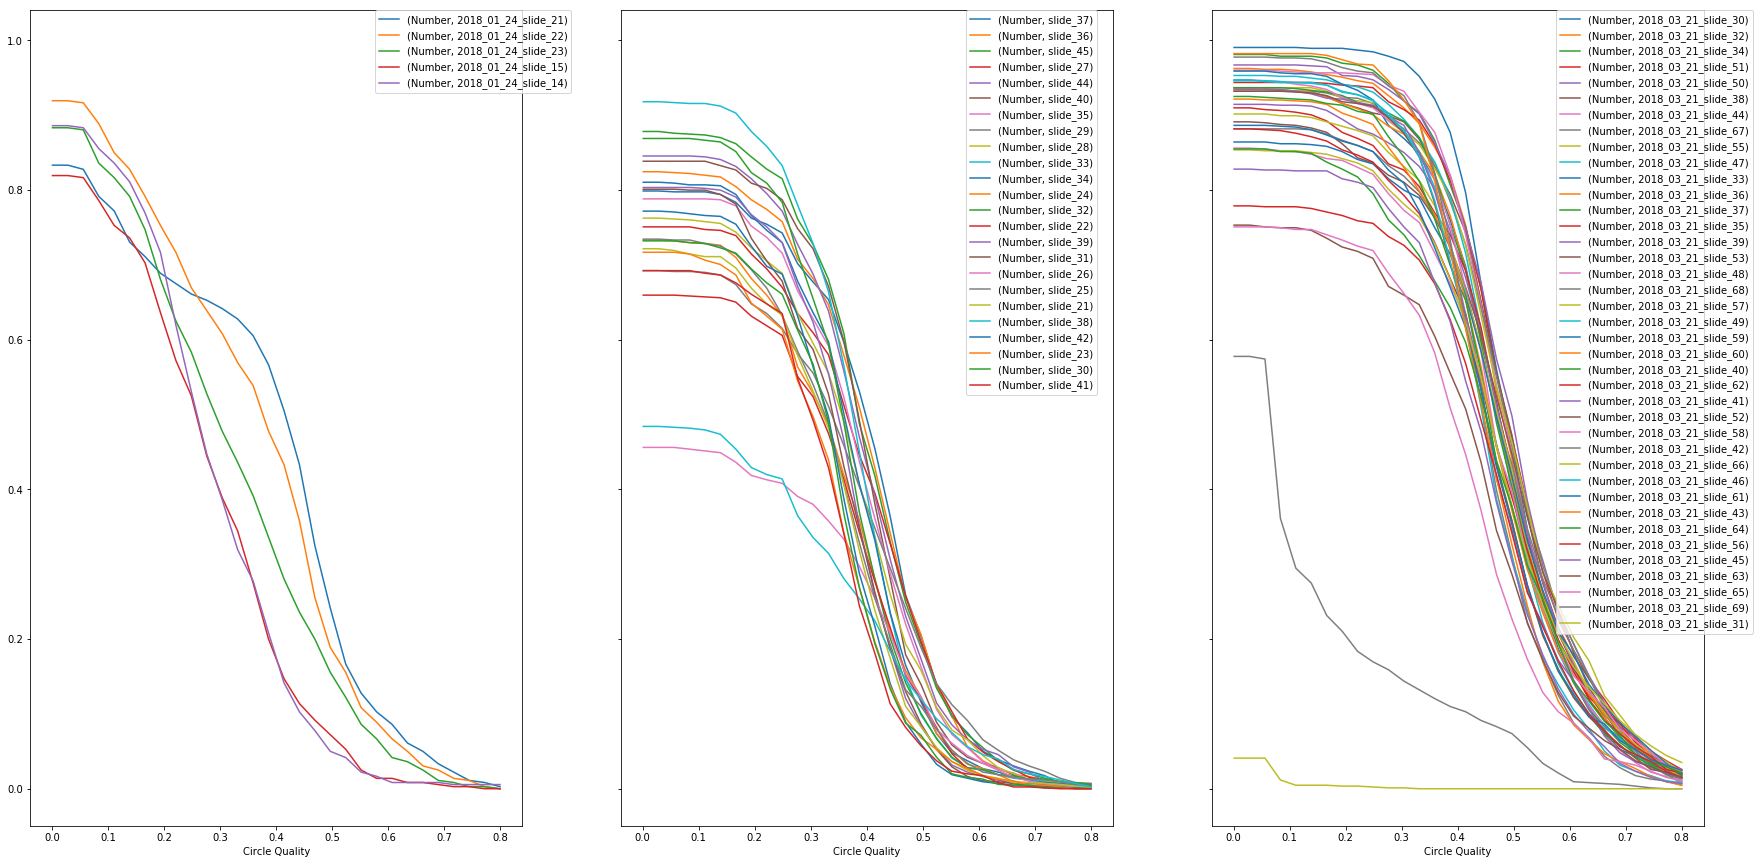

In [7]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(30,15), sharey=True)
spot_amount_1.plot(ax = axes[0])
spot_amount_2.plot(ax = axes[1])
spot_amount_3.plot(ax = axes[2])
for ax in axes:
    ax.legend(bbox_to_anchor=(0.70, 1), loc=2, borderaxespad=0.)

#    ax.vlines(0.4,0,1, linestyles="--")


plt.show()

In [8]:
data_2018_03_21_lf = data_2018_03_21.spots_pd[data_2018_03_21.spots_pd["Ligand"]=="LF"]
data_2018_03_21_lf["Ligand Batch"].unique()
#spots_amount_lf = 

array(['LF-0.05', 'LF-0.5', 'LF-0.0001', 'LF-0.001', 'LF-0.01', 'LF-0.1'],
      dtype=object)

In [9]:
data_2018_03_21.spots_pd["Ligand Batch"].unique()

array(['Empty', 'LF-0.05', 'LF-0.5', 'LF-0.0001', 'LF-0.001', 'LF-0.01',
       'P127', 'P130', 'P125', 'P124', 'P123', 'P122', 'P121', 'P120',
       'LF-0.1', 'P135', 'P128', 'P119', 'P118', 'P117', 'P134', 'P116',
       'P133', 'P132', 'P131.1', 'P115', 'P114', 'P131.2', 'P136', 'P077',
       'P076', 'P075', 'P074', 'P073', 'P072', 'P071', 'P070', 'P069',
       'P068', 'P067', 'P066', 'P065', 'P063', 'P061', 'P060', 'P059',
       'P057', 'P056', 'P055', 'P054', 'P052', 'P050', 'P048', 'P047',
       'P045.3', 'P044', 'P043', 'Nenad', 'P013', 'P012', 'P010', 'P009',
       'P008', 'P007', 'P106', 'P105', 'P104', 'P103', 'P102', 'P101',
       'P100', 'P099', 'P098', 'P096', 'P095', 'P094', 'P091', 'P090',
       'P089', 'P088', 'P086', 'P084', 'P083', 'P082', 'P081', 'P080'],
      dtype=object)

In [10]:
data_2018_03_21.spots_pd.groupby("Analyte Batch")["Collection"].unique().agg(len)

Analyte Batch
A/Aichi/2/68(H3N2)-X31-2018-04-13              3
A/Beijing/32/1992(H3N2)-2018-04-13             3
A/Brisbaine/59/2007(H1N1)-2018-04-13           3
A/Brisbane/10/2007(H3N2)-2018-04-13            3
A/California/7/2009(H1N1)-2018-04-13           3
A/Hong Kong/4801/2014(H3N2)-2018-04-13         3
A/Panama/2007/1999(H3N2)-2018-04-13            3
A/Perth/16/2009(H3N2)-2018-04-13               3
A/Switzerland/9715293/2013(H3N2)-2018-04-13    3
A/Texas/50/2012(H3N2)-2018-04-13               3
A/Victoria/361/2011(H3N2)-2018-04-13           3
Mi45-2018-04-13                                3
VicAlla-2018-04-13                             3
Name: Collection, dtype: int64

In [11]:
len(data_2018_03_21.spots_pd["Collection"].dropna().unique())

39

In [12]:
import itertools

test = list(itertools.product(*data_2018_03_21.collection_in_virbatch().values()))


In [13]:
data_2018_03_21.subset_collection(test[0]).spots_pd.groupby("Analyte Batch")["Collection"].unique().agg(len)


Analyte Batch
A/Aichi/2/68(H3N2)-X31-2018-04-13              1
A/Beijing/32/1992(H3N2)-2018-04-13             1
A/Brisbaine/59/2007(H1N1)-2018-04-13           1
A/Brisbane/10/2007(H3N2)-2018-04-13            1
A/California/7/2009(H1N1)-2018-04-13           1
A/Hong Kong/4801/2014(H3N2)-2018-04-13         1
A/Panama/2007/1999(H3N2)-2018-04-13            1
A/Perth/16/2009(H3N2)-2018-04-13               1
A/Switzerland/9715293/2013(H3N2)-2018-04-13    1
A/Texas/50/2012(H3N2)-2018-04-13               1
A/Victoria/361/2011(H3N2)-2018-04-13           1
Mi45-2018-04-13                                1
VicAlla-2018-04-13                             1
Name: Collection, dtype: int64

In [14]:
data_2018_03_21clean = data_2018_03_21.spots_pd.dropna(how="all")

In [15]:
data_2018_03_21clean["Analyte Batch"] = "Unkown"


In [16]:
data_clean = a2.Data(spots_pd=data_2018_03_21clean)

In [17]:
data_clean_sampled = data_clean.sample_on_collection(20)

In [18]:
data1 = pd.DataFrame(data_clean_sampled.x_pca_fit().transform(data_clean_sampled.x)[:,:2],index=data_clean_sampled.x.index , columns =["Principle 1", "Principle 2"])


In [19]:
def lda_plot(data, ax,contour=False, **kwargs):
    data.groupby("Collection")
    n = len(data1.groupby("Collection"))
    color=iter(cm.rainbow(np.linspace(0,1,n)))

    colors = ["r","g","b","k"]
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for n, d in data.groupby("Collection"):
        x = d["Principle 1"]
        y = d["Principle 2"]

        if contour:
            sns.kdeplot(x, y, label=n,ax=ax ,  c=next(color) , shade=True, shade_lowest=False,**kwargs )
            continue

        
        d.plot.scatter(x="Principle 1",y="Principle 2", ax=ax,    c=next(color), label=n,**kwargs)
from matplotlib.lines import Line2D

        

/home/janekg89/Envs/flutype_web_analysis/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'c', 'label'
  s)
/home/janekg89/Envs/flutype_web_analysis/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'c', 'label'
  s)
/home/janekg89/Envs/flutype_web_analysis/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'c', 'label'
  s)
/home/janekg89/Envs/flutype_web_analysis/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'c', 'label'
  s)
/home/janekg89/Envs/flutype_web_analysis/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'c', 'label'
  s)
/home/janekg89/Envs/flutype_web_analysis/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs 

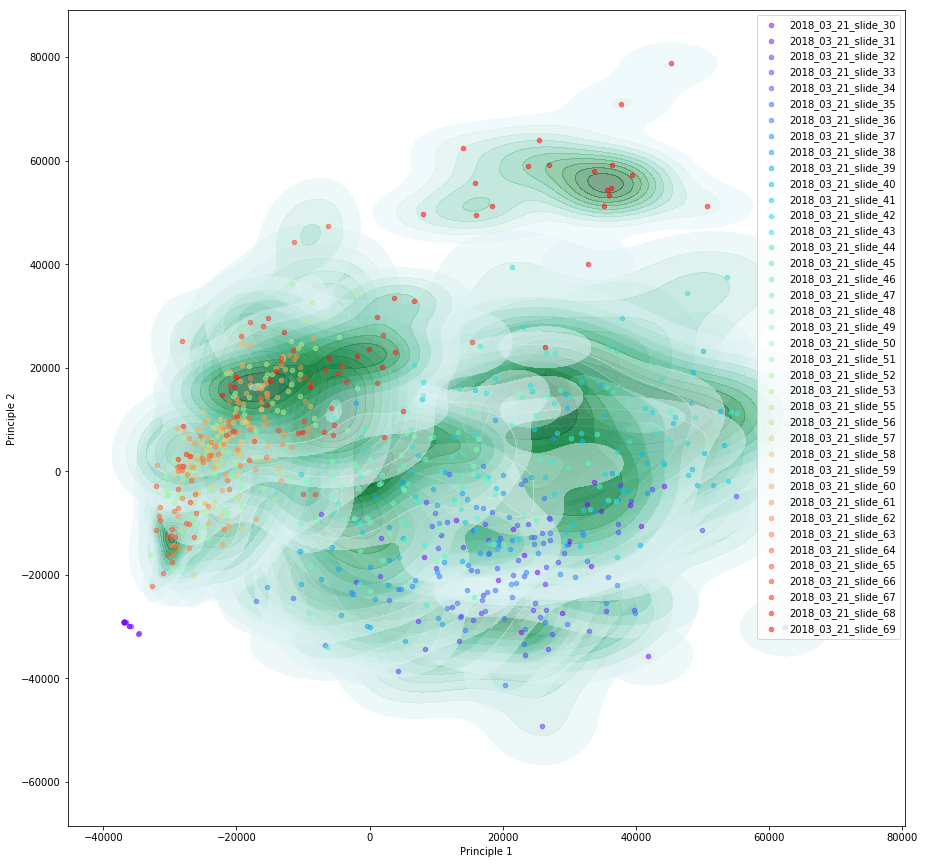

In [20]:
fig, ax = plt.subplots(figsize=(15,15))
#lda_plot(data_ldatrain,ax,contour=True,alpha=0.5)
#lda_plot(data_ldatest,ax,contour=True,alpha=0.5)
lda_plot(data1,ax,contour=True,alpha=0.5)

lda_plot(data1, ax=ax,alpha=0.5)

#add_legend(ax)


#lda_plot(data1,ax,marker="x")

plt.show()